In [1]:
import os

In [2]:
current_path = os.getcwd()
DATASET_PATH = os.path.join(current_path,'..\\', r'data\kranok-nv')

In [3]:
for dirname, _, filenames in os.walk(rf'{DATASET_PATH}'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00001.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00002.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00003.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00004.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00005.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00006.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00007.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00008.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotations\Normal_00009.json
C:\Users\margo\OneDrive\UOC\projects\thesis\notebooks\..\data\kranok-nv\Annotation

In [5]:
# Import the required libraries
import matplotlib.pyplot as plt
import json
import time
import cv2

In [6]:
# Define the paths for annotations and videos
videoPath = f"{DATASET_PATH}/Videos/"
dataPath = f"{DATASET_PATH}/Annotations/"

# Colors (BGR for OpenCV) for the bounding boxes
behaviorColors = [(255,0,0),(0,0,255)]

In [7]:
# Define the video to be analyzed (do not include the file extension type)
#   The dataset files can be found in /content/Annotations and /content/Videos
videoOfInterest = "Violent_00680"
# videoOfInterest = "Normal_00151"



Frame #1 - Number of Pedestrians: 1


Frame #2 - Number of Pedestrians: 1


Frame #3 - Number of Pedestrians: 1


Frame #4 - Number of Pedestrians: 1


Frame #5 - Number of Pedestrians: 1


Frame #6 - Number of Pedestrians: 1


Frame #7 - Number of Pedestrians: 1


Frame #8 - Number of Pedestrians: 1


Frame #9 - Number of Pedestrians: 1


Frame #10 - Number of Pedestrians: 1


Frame #11 - Number of Pedestrians: 1


Frame #12 - Number of Pedestrians: 1


Frame #13 - Number of Pedestrians: 1


Frame #14 - Number of Pedestrians: 1


Frame #15 - Number of Pedestrians: 1


Frame #16 - Number of Pedestrians: 1


Frame #17 - Number of Pedestrians: 1


Frame #18 - Number of Pedestrians: 1


Frame #19 - Number of Pedestrians: 1


Frame #20 - Number of Pedestrians: 1


Frame #21 - Number of Pedestrians: 1


Frame #22 - Number of Pedestrians: 1


Frame #23 - Number of Pedestrians: 1


Frame #24 - Number of Pedestrians: 1


Frame #25 - Number of Pedestrians: 1


Frame #26 - Number of Pedestrian

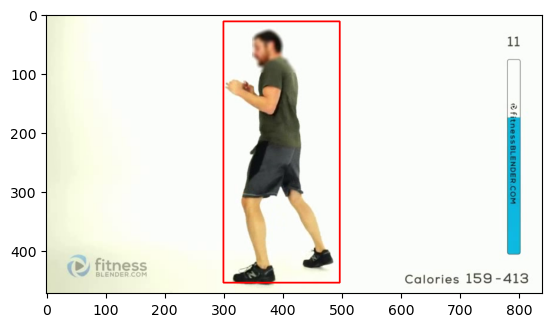

In [8]:
# Read annotation file
with open(dataPath+videoOfInterest+".json") as f:
    dataList = json.load(f)

# Read video file
video = cv2.VideoCapture(videoPath+videoOfInterest+".mp4")

# Maintain track of the current frame of the video with the annotations
frameCounter = 1

# Show each video frame with its corresponding information
ret,image = video.read()
while ret:
    frameKey = "Frame_"+"0"*(7-len(str(frameCounter)))+str(frameCounter)
    if frameKey in dataList.keys():
        numberOfPeople = dataList[frameKey]['numberOfPeople']
        pedestriansData = dataList[frameKey]['pedestriansData']
        for i in range(0,numberOfPeople):
            data = pedestriansData[i]
            ptA = (int(data[0]),int(data[1]))
            ptB = (int(data[2]),int(data[3]))
            color = behaviorColors[0] if data[4] == "Normal" else behaviorColors[1]
            cv2.rectangle(image, ptA, ptB, color, 2)

        #** Uncomment if used in Google Colab ** #
        print("\n\nFrame #{} - Number of Pedestrians: {}".format(frameCounter,numberOfPeople))

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        plt.imshow(image)


    ret,image = video.read()
    frameCounter += 1

video.release()

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Stats

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [12]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()